In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re 
from scipy import stats

import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 10.0)
plt.style.use('seaborn-poster')



Imported raw data, "00. InfoProduct.csv", into notebook. Data downloaded from Kaggle.com.

In [2]:
raw1 = pd.read_csv("00. InfoProduct.csv")

The following cell cleans the `raw1` data. 
1. We drop the 'Reviewer' column as the identifier for each reviewer is not relevant for our data analysis.
2. We put all of the column names in lowercase letters to make it easier to refer to specific columns for future analysis.
3. We changed the 'Price' column's currency from Indonesian Rupiah (RP) to USD. We do this by finding the exchange rate and muliplying that rate by every row in that column. 
4. Renamed 'merk' column to 'brand' since merk in Indonesian translates to brand in English

In [3]:
# 1. Drop "Reviewer" column
raw1=raw1.drop(['Reviewer'], axis=1)

# 2. lowercase column titles
new_colnames = [i.lower() for i in raw1.columns]
raw1=raw1.copy()
raw1.columns=new_colnames

# 3. Price: Rp --> USD
raw1['price'] = raw1['price'].str.replace('Rp.', '')
raw1['price'] = raw1['price'].str.replace('.','')
raw1['price'] = raw1['price'].astype(float)
raw1["price"] = 0.00007 * raw1["price"]

# 4. rename merk --> brand
raw1 = raw1.rename(columns = {"merk" : "brand"})
raw1 = raw1.rename(columns = {"overallrating" : "rating"})
raw1.head()

,category,brand,product,price,rating
0,Night Cream,Hada Labo,Perfect 3D Gel,6.37,3.8
1,Face Mist,PIXY,Aqua Beauty Protecting Mist,1.89,4.2
2,Night Cream,Wardah,Lightening Night Cream,0.00,3.5
3,Face Mist,Avene,Thermal Spring Water,13.93,4.4
4,Night Cream,Wardah,White Secret Night Cream,6.86,3.6


In the next cell we find the average ratings grouped by brand. 

In [4]:
#groupby avg rating by brand
brands_group=raw1.groupby('brand')['rating'].mean()



Now, we create a scatter plot too look at the relationship between rating and price of a product. We notice 2 distinct outliers (one around price= 3,600 and one around price=4,600) that makes our scatter plot not very useful in showing the relationship of interest. We fix this in the next cell.

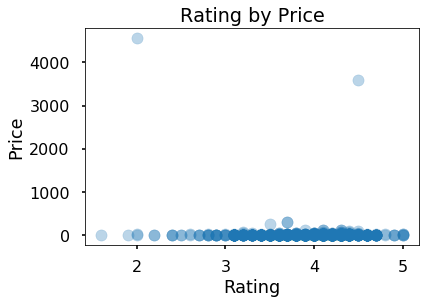

In [5]:
plt.scatter(x=raw1['rating'],y=raw1["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating by Price')
plt.show()

We want to look at low-priced and drugstore skin products since the average customer would be interested in better understanding this subset of products. This would also help our scatter plot be more informative since we are taking out the outliers. We use the next print statement to make sure we are not taking out a large portion of our sample.

In [6]:
print(raw1.loc[raw1.price >=50])

                  category             brand  \
40             Night Cream         Sulwhasoo   
68             Night Cream           Kiehl's   
155               Face Oil      Sunday Riley   
157               Face Oil      Sunday Riley   
173          Eye Treatment           Lancome   
176          Eye Treatment             SK-II   
242         Acne Treatment               OXY   
243         Acne Treatment               OXY   
249        Serum & Essence             SK-II   
264        Serum & Essence           Lancome   
342             Mask Sheet             SK-II   
555      Lotion & Emulsion             SK-II   
569               Face Oil           Kiehl's   
571               Face Oil             NIVEA   
584          Eye Treatment      Estee Lauder   
588          Eye Treatment           Kiehl's   
595          Eye Treatment    Drunk Elephant   
604  Brow & Lash Treatment         RapidLash   
653        Serum & Essence           Kiehl's   
654        Serum & Essence      Estee La

Now, we make a new dataframe `skincare_subset` that has keeps only the subset of products that cost 50 USD or less. Next, we redid the scatter plot with the new subset. 

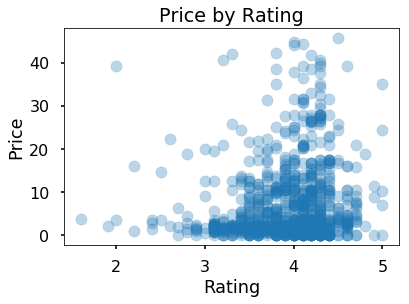

In [7]:
skincare_subset=raw1.loc[(raw1['price']<=50)]
plt.scatter(x=skincare_subset['rating'],y=skincare_subset["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()


We looked at the unique categories of skin products that we had in our dataset and realized some of them were not for the skin. The next few cells create a new dataframe `skincare_subset2` that removes the following categories from our dataset: 'Eye Treatment', 'Brow & Lash Treatment', 'Peeling', 'Nose Pack', and 'Wash-Off'

In [8]:
#look at unique categories
print(skincare_subset.category.unique() )

['Night Cream' 'Face Mist' 'Day Cream' 'Sun Protection'
 'Lotion & Emulsion' 'Face Oil' 'Eye Treatment' 'Brow & Lash Treatment'
 'Skin Soothing Treatment' 'Acne Treatment' 'Serum & Essence' 'Peeling'
 'Sleeping Mask' 'Mask Sheet' 'Nose Pack' 'Wash-Off' 'Facial Wash'
 'Cream & Lotion' 'Oil' 'Makeup Remover' 'Scrub & Exfoliator' 'Toner']


In [9]:
#new subset with only face-specific categories
skincare_subset2=skincare_subset.loc[(skincare_subset['category']!= 'Eye Treatment') & (skincare_subset['category']!='Brow & Lash Treatment')& (skincare_subset['category']!='Peeling')& (skincare_subset['category']!='Nose Pack')& (skincare_subset['category']!='Wash-Off')]

In [10]:
#Confirm that categories were removed
print(skincare_subset2.category.unique() )

['Night Cream' 'Face Mist' 'Day Cream' 'Sun Protection'
 'Lotion & Emulsion' 'Face Oil' 'Skin Soothing Treatment' 'Acne Treatment'
 'Serum & Essence' 'Sleeping Mask' 'Mask Sheet' 'Facial Wash'
 'Cream & Lotion' 'Oil' 'Makeup Remover' 'Scrub & Exfoliator' 'Toner']


The next two box plots look at the different skin categories. We look at how prices vary by category and then how ratings vary by category. 

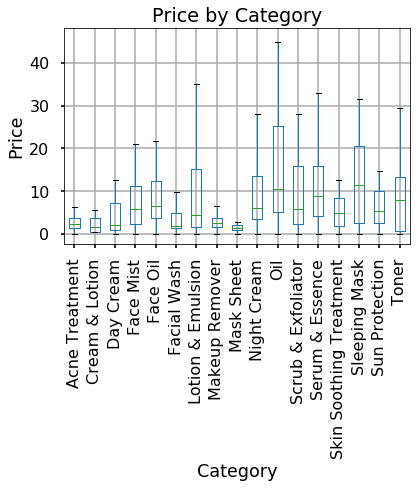

In [36]:
#Price by Category
plot=skincare_subset2.boxplot('price', by='category', rot=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price by Category')
plt.suptitle('')
plt.show()

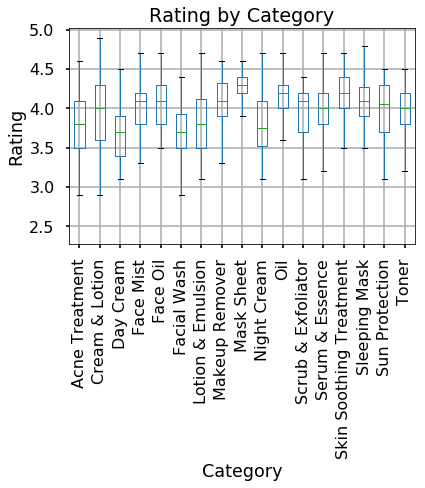

In [32]:
#Rating by Category
plot=skincare_subset2.boxplot('rating', by='category', rot=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating by Category')
plt.suptitle('')
plt.show()

Imported second raw dataset, "cosmetic.csv", into notebook. Data downloaded from Kaggle.com.

In [13]:
raw2 = pd.read_csv("cosmetic.csv")
raw2.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


The following cell cleans the `raw2` data. 
1. We put all of the column names in lowercase letters to make it easier to refer to specific columns for future analysis.
2. We drop the 'url' column as the url for each product is not relevant for our data analysis.
3. Too make it easier to read, we kept only the first word before the hyphen in the "Label" column. For example, "moisturizing-cream-oils-mists" is now just "moisturizing". 

We copied `raw2` and set it equal to a new dataframe titled `skin`.

In [14]:
# 1. Lowercase column names
col_lower = [i.lower() for i in raw2.columns]
raw2=raw2.copy()
raw2.columns=col_lower

In [15]:
raw2.head()

,label,url,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


In [16]:
# 2. Drop url column
raw2=raw2.drop(['url'], axis=1)

In [17]:
# 3. Keep word before hyphen in 'label' column
liste = [i.split("-",1)[0] for i in raw2.label]
skin = raw2.copy()
skin['label'] = liste 

skin.head()



,label,brand,name,price,rank,skin_type,ingredients
0,moisturizing,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


Next, we wanted to simplify the "skin_type" column information. To do this we took each unique skin type and made a new column for each one. For each product in the dataset,if the product's 'skin_type' column specifies a certain skin type, that skin type's column changes to 1. If not, it stays at 0 (each skin type column is its own dummy variable). 

For example, the Crème de la Mer (row 0) says it's for Normal, Oily, Combination, Dry, and Sensitive types of skin. So each of those skin type columns will be filled with a 1 instead of the default 0. 

To do this we did the following steps:
1. Found unique skin types and manually created a list of them tiled `unique_skin_list`
2. Looped though `unique_skin_list` and added a new column of zeros to `skin` dataframe for each string in the list.
3. Made all entries within "skin_type" column strings (becuase some were floats from the original dataset)
4. Loop through each product's "skin_type" column. For each product, we looked to see if a skin type from `unique_skin_list` was in that product's "skin_type" column. If it was, we set the corresponding column =1. If it wasn't, we left it =0. 


In [18]:
# 1. Find unique skin types and create list of them
print(skin.skin_type.unique())
unique_skin_list = ['Normal','Oily', 'Combination', 'Dry', 'Sensitive', 'Full', 'Natural', 'Matte', 'Light', 'Radiant']

["['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Natural\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Sensitive\\n']" '[]'
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Normal\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Normal\\n', '✔ Dry\\n']" "['✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Oily\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Full\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Medium\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Radiant\\n']"
 "

In [19]:
# 2. Loop through list and add a new column of zeros to dataframe for each unqiue skin-type
for x in unique_skin_list:
    skin[x]=0

skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",0,0,0,0,0,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,0,0,0,0,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",0,0,0,0,0,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,0,0,0,0,0,0,0,0,0,0


In [20]:
# 3. make all entries within "skin_type" column strings
skin['skin_type'] = skin['skin_type'].astype(str)

In [21]:
# 4. Loop through product's "skin_type" column and adjust skin type columns accordingly
count=-1
for x in skin['skin_type']:
    count+=1
    for s_type in unique_skin_list:
        if s_type in x:
            skin.loc[count,s_type]=1

            


To make the "price" column of `skin` to look similar to our first dataset's "price" column, we dropped the dollar sign from the column values.

In [23]:
skin['price'] = skin['price'].str.replace('$','')

In [24]:
skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00\n(214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


Some rows's "price" column show two values (ex: Facial Treatment Essence (Row 2) has "price" = 179.00\n(214.00 value)), so we want to just show the first price. 

To do this we did the following:

1) We looped through the "price" column to find any rows that had a string length greater than 10. We know these rows are the ones that have two values and that we want to change.

2) For those rows identified, we found the first decimal point and then spliced that string 2 indexes past it so that just the first price is kept

In [25]:
# 1) look through "price" to find rows with string length greater than 10. Print value and row number. 
skin['price'] = skin['price'].astype(str)
row=-1
for x in skin['price']:
    row+=1
    if len(x)>10:
        print(x)
        print(row)

179.00
(214.00 value)
1
90.00
(123.00 value)
15
69.00
(106.00 value)
178
68.00
(96.00 value)
185
179.00
(214.00 value)
300
90.00
(123.00 value)
307
45.00
(66.00 value)
451
7.00
(10.00 value)
454
34.00
(63.00 value)
515
39.00 27.00
544
55.00
(69.00 value)
551
28.00 19.00
557
35.00
(45.00 value)
577
179.00
(214.00 value)
600
158.00
(175.00 value)
603
178.00
(210.00 value)
607
88.00
(102.00 value)
608
90.00
(123.00 value)
617
88.00
(102.00 value)
618
28.00
(43.00 value)
620
23.00
(30.00 value)
625
88.00
(102.00 value)
700
68.00
(97.00 value)
733
100.00 59.00
757
169.00
(189.00 value)
759
35.00
(71.00 value)
761
29.00
(67.00 value)
785
90.00 59.00
795
68.00
(72.00 value)
801
55.00
(88.00 value)
803
59.00
(93.00 value)
820
34.00
(63.00 value)
836
84.00
(115.00 value)
843
75.00
(254.00 value)
901
135.00
(170.00 value)
902
36.00
(57.00 value)
904
25.00
(36.00 value)
905
18.00
(24.00 value)
934
169.00
(236.00 value)
957
34.00 22.00
1003
35.00
(45.00 value)
1063
69.00 45.00
1084
20.00 11.00
109

In [26]:
# 2) find decimal and splice
step=-1
for x in skin['price']:
    step+=1
    if len(x)>10:
        first_dec=skin.loc[step,'price'].find('.')
        skin.loc[step,'price']= skin.loc[step,'price'][:(first_dec+3)]

            
skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


We dropped the "skin_type" column now that we made each unique skin type it's own column.

In [28]:
skin = skin.drop(['skin_type'], axis = 1)

Finally, we lower cased all the columns again (becuase the new skin type columns wer

In [30]:
lower_ingredients = [i.lower() for i in skin.columns]
skin=skin.copy()
skin.columns=lower_ingredients

In [31]:
skin.head()

,label,brand,name,price,rank,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0
